<a href="https://colab.research.google.com/github/draglar/Financial-Inclusion/blob/main/Ian_Dsc_Core_IP_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Financial Inclusion in Kenya,Rwanda,Tanzania and Uganda**

###Defining the Question

####Specifying the Question

> Predict which individuals are most likely to have a bank account in Kenya, Rwanda, Tanzania and Uganda.

####Metric for success

> The project will be a success if my model can predict which individuals are most likely to have a bank account in Kenya, Rwanda, Tanzania and Uganda with an accuracy of at least 80 %

####Understanding the context

> Access to bank accounts has been regarded as an indicator of financial inclusion.Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services.

>However financial inclusion remains one of the main obstacles to economic development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account

####Experimental design taken

>In this study, I will be conducting Explorative Data Analysis - Univariate, Bivariate and Multivariate Analysis - to get the relationships and differences between different variables and finally come up with a prediction on individuals who are most likely to have a bank account

###importing the necessary liblaries and dataset

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [627]:
finances=pd.read_csv('Financial Dataset - 1.csv')

In [628]:
details=pd.read_csv('VariableDefinitions.csv')

###Reading the dataset

In [629]:
details

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [630]:
finances.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [631]:
finances.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [632]:
finances.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

###Cleaning the dataset

####renaming columns

In [633]:
finances.uniqueid

0           uniqueid_1
1           uniqueid_2
2           uniqueid_3
3           uniqueid_4
4           uniqueid_5
             ...      
23519    uniqueid_2113
23520    uniqueid_2114
23521    uniqueid_2115
23522    uniqueid_2116
23523    uniqueid_2117
Name: uniqueid, Length: 23524, dtype: object

Removing the unnecessary segment 'uniqueid_' from the unique id segment

In [634]:
finances.uniqueid=finances.uniqueid.str.replace('uniqueid_','').astype(int)

####removing outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


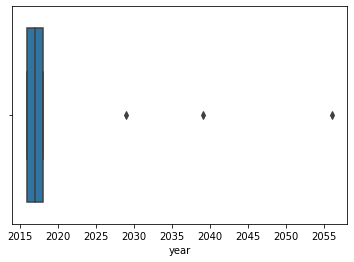

In [635]:
sns.boxplot(finances.year)

In [636]:
yr_1, yr_3 = np.percentile(finances.year, [25, 75]) 
iqr = yr_3 - yr_1
u_bound = yr_3 + (1.5 * iqr)
finances=finances[~(finances.year>u_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


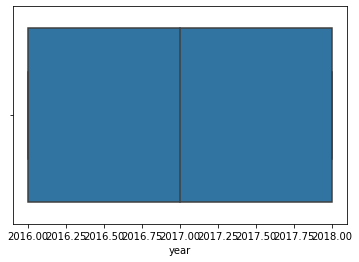

In [637]:
sns.boxplot(finances.year)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


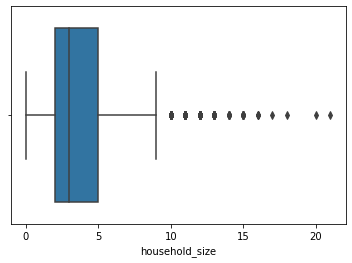

In [638]:
sns.boxplot(finances['household_size'])

In [639]:
hs_1 = finances['household_size'].quantile(.25)
hs_3 = finances['household_size'].quantile(.75)
iqr = hs_3 - hs_1
u_bound = hs_3 + (1.5 * iqr)
finances=finances[~(finances['household_size']>=u_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


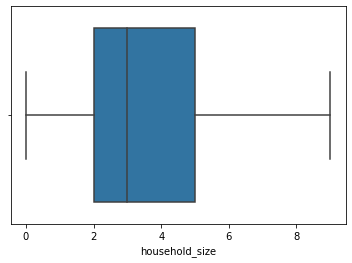

In [640]:
sns.boxplot(finances['household_size'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


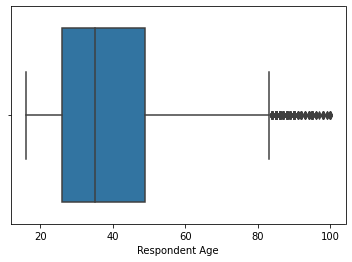

In [641]:
sns.boxplot(finances['Respondent Age'])

In [642]:
ra_1 = finances['Respondent Age'].quantile(.25)
ra_3 = finances['Respondent Age'].quantile(.75)
iqr = ra_3 - ra_1
u_bound = ra_3 + (1.5 * iqr)
finances=finances[~(finances['Respondent Age']>=u_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


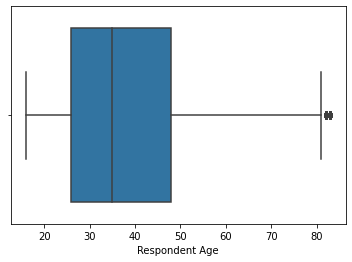

In [643]:
sns.boxplot(finances['Respondent Age'])

In [644]:
ra_1 = finances['Respondent Age'].quantile(.25)
ra_3 = finances['Respondent Age'].quantile(.75)
iqr = ra_3 - ra_1
u_bound = ra_3 + (1.5 * iqr)
finances=finances[~(finances['Respondent Age']>=u_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


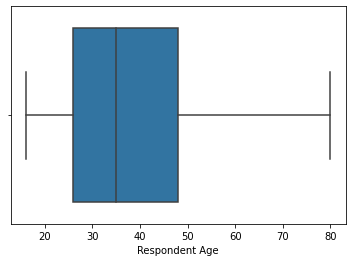

In [645]:
sns.boxplot(finances['Respondent Age'])

####Checking for anomalies

In [646]:
finances.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          14
Cell Phone Access         10
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [647]:
finances.dropna(inplace=True)

In [648]:
finances.duplicated().sum()

0

In [649]:
finances.shape

(22628, 13)

###Exploratory Analysis

#####Countries

######countries and bank accounts

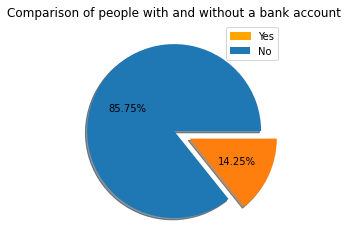

In [650]:
y_hs=finances['Has a Bank account']
title='Comparison of people with and without a bank account'
plt.pie(y_hs.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))
no=mpatches.Patch(label='No')
yes= mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[yes,no])
plt.title(title)
plt.show()

> most survey respondents did not have a bank account

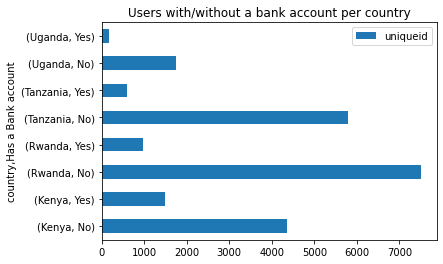

In [651]:
y_hs=finances[['country','Has a Bank account','uniqueid']]
title='Users with/without a bank account per country'
y_hs.groupby(['country','Has a Bank account']).count().plot(kind='barh',rot=0,stacked=True,title=title)

> an overview of distribution of those with and without bank accounts per country shows the relationship between the four countries

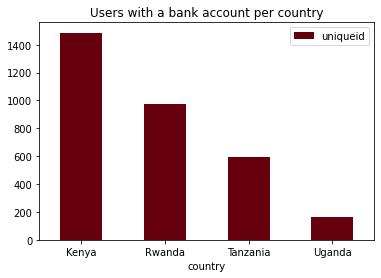

In [652]:
y_has=finances[['country','uniqueid']][finances['Has a Bank account']=='Yes']
title='Users with a bank account per country'
y_has=y_has.groupby(['country']).count().sort_values('uniqueid',ascending=False)
y_has.plot(kind='bar',rot=0,colormap='Reds_r',title=title)

> An overview of those with bank accounts in the 4 countries shows most of the respondents with bank accounts are in Kenya

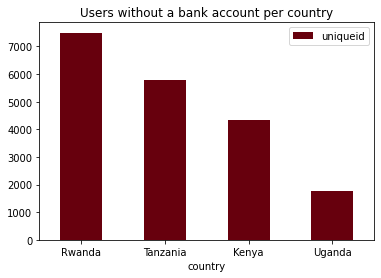

In [653]:
n_has=finances[['country','uniqueid']][finances['Has a Bank account']=='No']
title='Users without a bank account per country'
n_has=n_has.groupby(['country']).count().sort_values('uniqueid',ascending=False)
n_has.plot(kind='bar',rot=0,colormap='Reds_r',title=title)

>an overview of those without bank accounts shows most of the respondents without bank accounts are from Rwanda

In [654]:
finances['country'].value_counts()

Rwanda      8475
Tanzania    6392
Kenya       5842
Uganda      1919
Name: country, dtype: int64

>A frequency distribution of the total respondents from each country

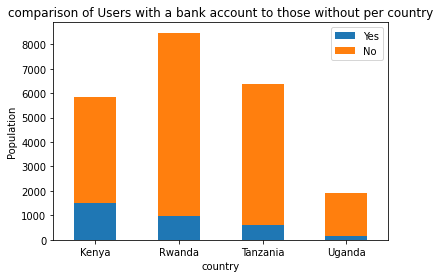

In [655]:
y_bnk=finances[['country','uniqueid']][finances['Has a Bank account']=='Yes']
n_bnk=finances[['country','uniqueid']][finances['Has a Bank account']=='No']
title='comparison of Users with a bank account to those without per country'
y_bnk=y_bnk.groupby(['country']).count()
n_bnk=n_bnk.groupby(['country']).count()
y_bnk.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_bnk['No']=n_bnk
y_bnk.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Population')

######countries and cell phone access

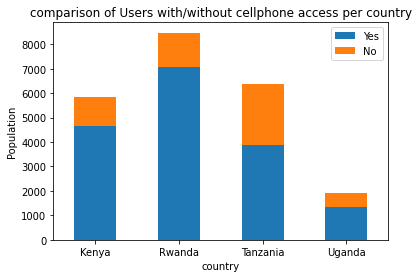

In [656]:
y_cell=finances[['country','uniqueid']][finances['Cell Phone Access']=='Yes']
n_cell=finances[['country','uniqueid']][finances['Cell Phone Access']=='No']
title='comparison of Users with/without cellphone access per country'
y_cell=y_cell.groupby(['country']).count()
n_cell=n_cell.groupby(['country']).count()
y_cell.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_cell['No']=n_cell
y_cell.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Population')

#####Genders

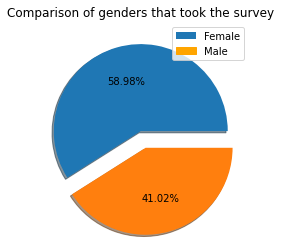

In [657]:
g_hs=finances['gender_of_respondent']
title='Comparison of genders that took the survey'
plt.pie(g_hs.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))

female=mpatches.Patch(label='Female')
male = mpatches.Patch(color='orange', label='Male')
plt.legend(handles=[female,male])
plt.title(title)
plt.show()

######Genders and bank accounts

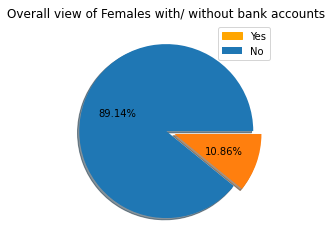

In [658]:
f_bnk=finances['Has a Bank account'][finances['gender_of_respondent']=='Female']
title='Overall view of Females with/ without bank accounts'
plt.pie(f_bnk.value_counts(),autopct='%0.2f%%',explode=(0,0.1),shadow=True)
no=  mpatches.Patch(label='No')
yes= mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[yes,no])
plt.title(title)
plt.show()

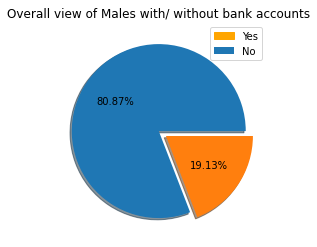

In [659]:
m_bnk=finances['Has a Bank account'][finances['gender_of_respondent']=='Male']
title='Overall view of Males with/ without bank accounts'
plt.pie(m_bnk.value_counts(),autopct='%0.2f%%',explode=(0,0.1),shadow=True)
no=  mpatches.Patch(label='No')
yes= mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[yes,no])
plt.title(title)
plt.show()

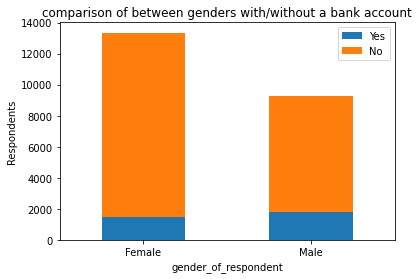

In [660]:
y_bnk=finances[['gender_of_respondent','uniqueid']][finances['Has a Bank account']=='Yes']
n_bnk=finances[['gender_of_respondent','uniqueid']][finances['Has a Bank account']=='No']
title='comparison of between genders with/without a bank account'
y_bnk=y_bnk.groupby(['gender_of_respondent']).count()
n_bnk=n_bnk.groupby(['gender_of_respondent']).count()
y_bnk.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_bnk['No']=n_bnk
y_bnk.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Respondents')

######Genders in different countries

In [661]:
finances.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [662]:
female=mpatches.Patch(label='Female')
male = mpatches.Patch(color='orange', label='Male')

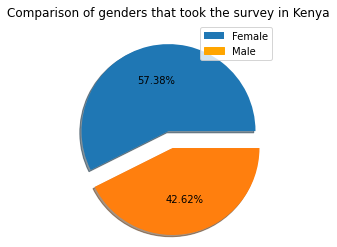

In [663]:
g_ken=finances['gender_of_respondent'][finances.country=='Kenya']
title='Comparison of genders that took the survey in Kenya'
plt.pie(g_ken.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))
plt.legend(handles=[female,male])
plt.title(title)
plt.show()

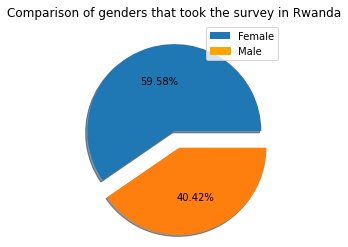

In [664]:
g_rw=finances['gender_of_respondent'][finances.country=='Rwanda']
title='Comparison of genders that took the survey in Rwanda'
plt.pie(g_rw.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))

plt.legend(handles=[female,male])
plt.title(title)
plt.show()

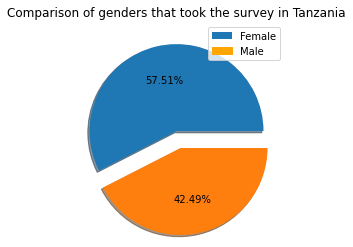

In [665]:
g_tz=finances['gender_of_respondent'][finances.country=='Tanzania']
title='Comparison of genders that took the survey in Tanzania'
plt.pie(g_tz.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))

plt.legend(handles=[female,male])
plt.title(title)
plt.show()

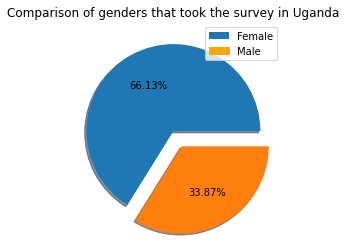

In [666]:
g_ug=finances['gender_of_respondent'][finances.country=='Uganda']
title='Comparison of genders that took the survey in Uganda'
plt.pie(g_ug.value_counts(),autopct='%0.2f%%',shadow=True,explode=(0,0.2))
plt.legend(handles=[female,male])
plt.title(title)
plt.show()

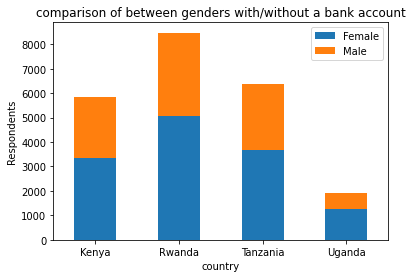

In [667]:
f_cntry=finances[['gender_of_respondent','country']][finances['gender_of_respondent']=='Female']
m_cntry=finances[['gender_of_respondent','country']][finances['gender_of_respondent']=='Male']
title='comparison of between genders with/without a bank account'
f_cntry=f_cntry.groupby(['country']).count()
m_cntry=m_cntry.groupby(['country']).count()
f_cntry.rename(columns = {'gender_of_respondent':'Female'}, inplace = True)
f_cntry['Male']=m_cntry
f_cntry.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Respondents')

######Genders and cell phone access

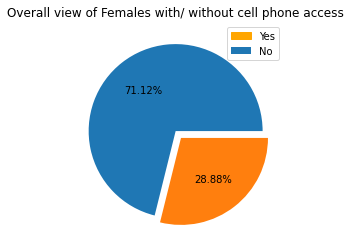

In [668]:
m_bnk=finances['Cell Phone Access'][finances['gender_of_respondent']=='Female']
title='Overall view of Females with/ without cell phone access'
plt.pie(m_bnk.value_counts(),autopct='%0.2f%%',explode=(0,0.1))
no=  mpatches.Patch(label='No')
yes= mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[yes,no])
plt.title(title)
plt.show()

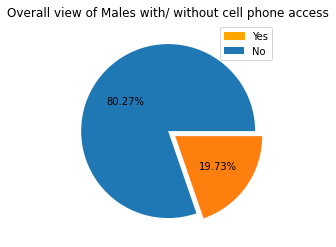

In [669]:
m_bnk=finances['Cell Phone Access'][finances['gender_of_respondent']=='Male']
title='Overall view of Males with/ without cell phone access'
plt.pie(m_bnk.value_counts(),autopct='%0.2f%%',explode=(0,0.1))
no=  mpatches.Patch(label='No')
yes= mpatches.Patch(color='orange', label='Yes')
plt.legend(handles=[yes,no])
plt.title(title)
plt.show()

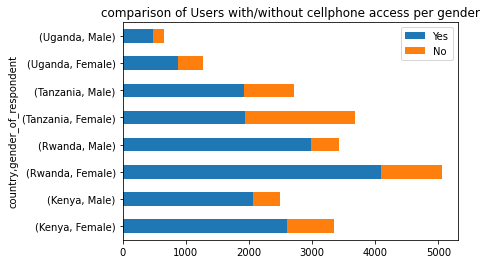

In [670]:
y_cell=finances[['gender_of_respondent','country','uniqueid']][finances['Cell Phone Access']=='Yes']
n_cell=finances[['gender_of_respondent','country','uniqueid']][finances['Cell Phone Access']=='No']
title='comparison of Users with/without cellphone access per gender'
y_cell=y_cell.groupby(['country','gender_of_respondent']).count()
n_cell=n_cell.groupby(['country','gender_of_respondent']).count()
y_cell.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_cell['No']=n_cell
y_cell.plot(kind='barh',title=title,stacked=True,rot=0,ylabel='Population')

#####Ages

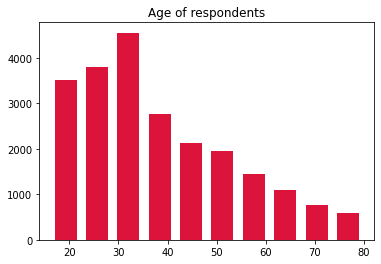

In [671]:
title='Age of respondents'
plt.hist(finances['Respondent Age'],rwidth=0.7, color='crimson')
plt.title(title)
plt.show()

>The histogram shows the distribution of respondents across different age groups

In [672]:
finances['Respondent Age'].describe()

count    22628.000000
mean        38.160465
std         15.577676
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         80.000000
Name: Respondent Age, dtype: float64

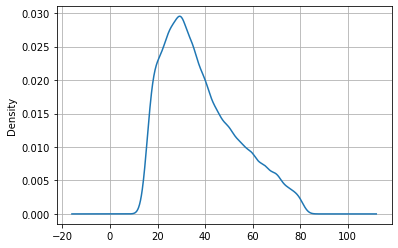

In [725]:
finances['Respondent Age'].plot(kind='density',grid=True)

> the average age of the respondents was 38 years, the highest 80 years wile the lowest was 16 years

In [726]:
finances['Respondent Age'].skew(),finances['Respondent Age'].kurt()

(0.7176686275970037, -0.2927003294223387)

> the ages are skewed to the right with a value of 0.7, meaning respondents are concentrated to the left

>Age is platykurtic with a kurtosis value of -0.29

#####location types

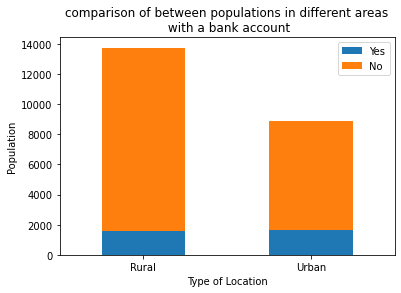

In [674]:
y_bnk=finances[['Type of Location','uniqueid']][finances['Has a Bank account']=='Yes']
n_bnk=finances[['Type of Location','uniqueid']][finances['Has a Bank account']=='No']
title='comparison of between populations in different areas\n with a bank account'
y_bnk=y_bnk.groupby(['Type of Location']).count()
n_bnk=n_bnk.groupby(['Type of Location']).count()
y_bnk.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_bnk['No']=n_bnk
y_bnk.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Population')

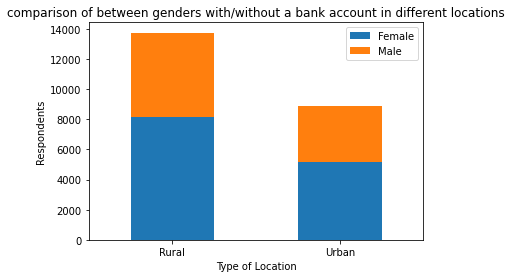

In [675]:
f_loc=finances[['gender_of_respondent','Type of Location']][finances['gender_of_respondent']=='Female']
m_loc=finances[['gender_of_respondent','Type of Location']][finances['gender_of_respondent']=='Male']
title='comparison of between genders with/without a bank account in different locations'
f_loc=f_loc.groupby(['Type of Location']).count()
m_loc=m_loc.groupby(['Type of Location']).count()
f_loc.rename(columns = {'gender_of_respondent':'Female'}, inplace = True)
f_loc['Male']=m_loc
f_loc.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Respondents')

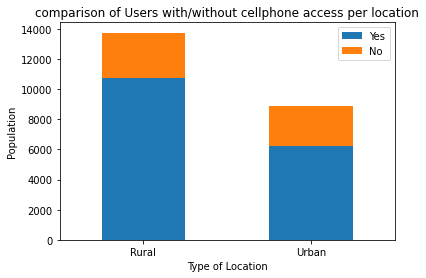

In [676]:
y_cell=finances[['Type of Location','uniqueid']][finances['Cell Phone Access']=='Yes']
n_cell=finances[['Type of Location','uniqueid']][finances['Cell Phone Access']=='No']
title='comparison of Users with/without cellphone access per location'
y_cell=y_cell.groupby(['Type of Location']).count()
n_cell=n_cell.groupby(['Type of Location']).count()
y_cell.rename(columns = {'uniqueid':'Yes'}, inplace = True)
y_cell['No']=n_cell
y_cell.plot(kind='bar',title=title,stacked=True,rot=0,ylabel='Population')

A lot more people in rural areas and a higher percentage of them dont have bank accounts

In [677]:
finances.dtypes

country                    object
year                        int64
uniqueid                    int64
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

#####Job types

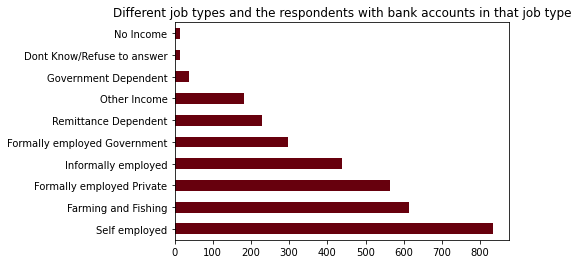

In [678]:
j_typ_y_bnk=finances['Type of Job'][finances['Has a Bank account']=='Yes'].value_counts()
title='Different job types and the respondents with bank accounts in that job type'
j_typ_y_bnk.plot(kind='barh',colormap='Reds_r',title=title)

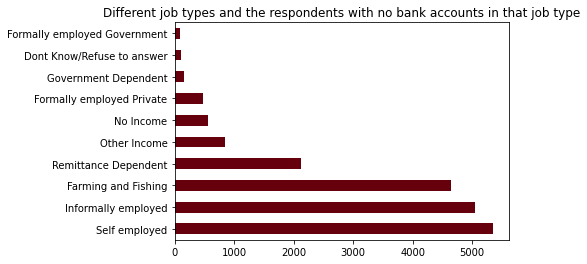

In [679]:
j_typ_n_bnk=finances['Type of Job'][finances['Has a Bank account']=='No'].value_counts()
title='Different job types and the respondents with no bank accounts in that job type'
j_typ_n_bnk.plot(kind='barh',colormap='Reds_r',title=title)

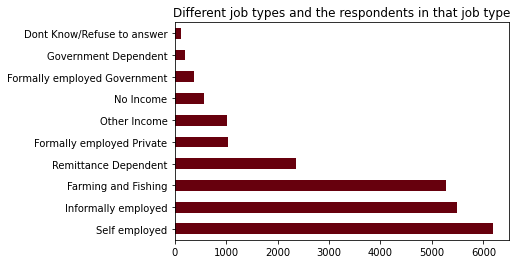

In [680]:
j_typ=finances['Type of Job'].value_counts()
title='Different job types and the respondents in that job type'
j_typ.plot(kind='barh',colormap='Reds_r',title=title)

#####level of education

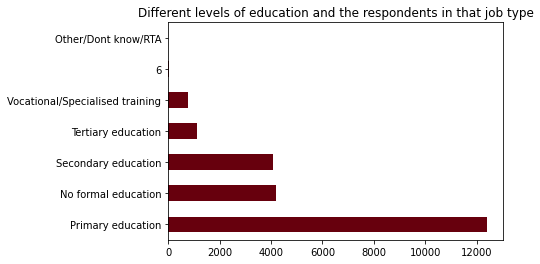

In [681]:
edu=finances['Level of Educuation'].value_counts()
title='Different levels of education and the respondents in that job type'
edu.plot(kind='barh',colormap='Reds_r',title=title)

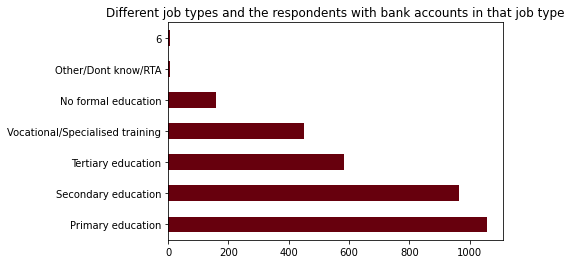

In [682]:
edu_y_bnk=finances['Level of Educuation'][finances['Has a Bank account']=='Yes'].value_counts()
title='Different job types and the respondents with bank accounts in that job type'
edu_y_bnk.plot(kind='barh',colormap='Reds_r',title=title)

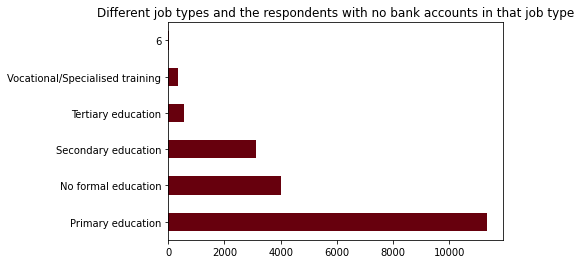

In [683]:
edu_n_bnk=finances['Level of Educuation'][finances['Has a Bank account']=='No'].value_counts()
title='Different job types and the respondents with no bank accounts in that job type'
edu_n_bnk.plot(kind='barh',colormap='Reds_r',title=title)

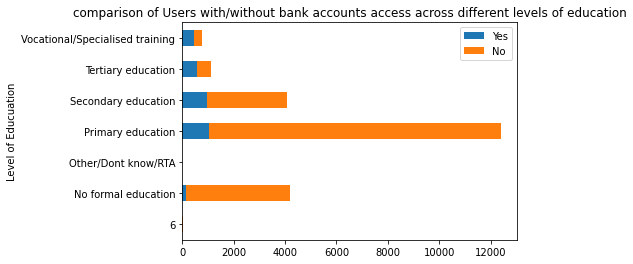

In [684]:
edu_y_bnk=finances[['Level of Educuation','uniqueid']][finances['Has a Bank account']=='Yes']
edu_n_bnk=finances[['Level of Educuation','uniqueid']][finances['Has a Bank account']=='No']
title='comparison of Users with/without bank accounts access across different levels of education'
edu_y_bnk=edu_y_bnk.groupby(['Level of Educuation']).count()
edu_n_bnk=edu_n_bnk.groupby(['Level of Educuation']).count()
edu_y_bnk.rename(columns = {'uniqueid':'Yes'}, inplace = True)
edu_y_bnk['No']=edu_n_bnk
edu_y_bnk.plot(kind='barh',title=title,stacked=True,rot=0,ylabel='Population')

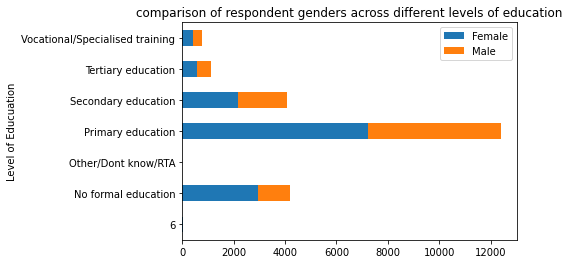

In [685]:
edu_f=finances[['Level of Educuation','uniqueid']][finances['gender_of_respondent']=='Female']
edu_m=finances[['Level of Educuation','uniqueid']][finances['gender_of_respondent']=='Male']
title='comparison of respondent genders across different levels of education'
edu_f=edu_f.groupby(['Level of Educuation']).count()
edu_m=edu_m.groupby(['Level of Educuation']).count()
edu_f.rename(columns = {'uniqueid':'Female'}, inplace = True)
edu_f['Male']=edu_m
edu_f.plot(kind='barh',title=title,stacked=True,rot=0,ylabel='Population')

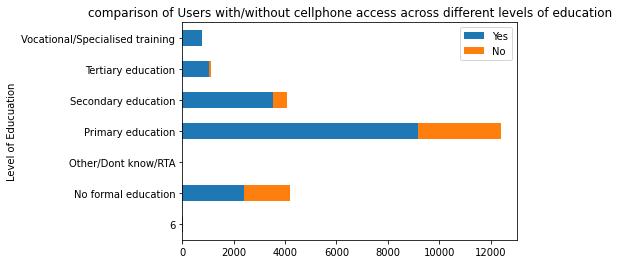

In [686]:
edu_y_cell=finances[['Level of Educuation','uniqueid']][finances['Cell Phone Access']=='Yes']
edu_n_cell=finances[['Level of Educuation','uniqueid']][finances['Cell Phone Access']=='No']
title='comparison of Users with/without cellphone access across different levels of education'
edu_y_cell=edu_y_cell.groupby(['Level of Educuation']).count()
edu_n_cell=edu_n_cell.groupby(['Level of Educuation']).count()
edu_y_cell.rename(columns = {'uniqueid':'Yes'}, inplace = True)
edu_y_cell['No']=edu_n_cell
edu_y_cell.plot(kind='barh',title=title,stacked=True,rot=0,ylabel='Population')

#####Correlations

######label encoding the columns

In [687]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [688]:
finances['country']=le.fit_transform(finances['country'])
finances['Has a Bank account']=le.fit_transform(finances['Has a Bank account'])
finances['gender_of_respondent']=le.fit_transform(finances['gender_of_respondent'])
finances['Type of Location']=le.fit_transform(finances['Type of Location'])
finances['Cell Phone Access']=le.fit_transform(finances['Cell Phone Access'])
finances['gender_of_respondent']=le.fit_transform(finances['gender_of_respondent'])
finances['The relathip with head']=le.fit_transform(finances['The relathip with head'])
finances['marital_status']=le.fit_transform(finances['marital_status'])
finances['Level of Educuation']=le.fit_transform(finances['Level of Educuation'])
finances['Type of Job']=le.fit_transform(finances['Type of Job'])

In [723]:
finances.describe()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,1.193919,2016.968446,3435.303871,0.142523,0.392478,0.748763,3.585823,38.160465,0.410200,2.227859,2.379132,3.012507,5.415149
std,0.917778,0.846495,2254.340050,0.349593,0.488313,0.433734,2.080795,15.577676,0.491881,1.898135,0.994847,1.200747,3.089894
min,0.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,1476.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,1.000000,2.000000,3.000000,2.000000
50%,1.000000,2017.000000,3230.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,1.000000,2.000000,3.000000,5.000000
75%,2.000000,2018.000000,5184.000000,0.000000,1.000000,1.000000,5.000000,48.000000,1.000000,5.000000,3.000000,4.000000,9.000000
max,3.000000,2018.000000,8759.000000,1.000000,1.000000,1.000000,9.000000,80.000000,1.000000,5.000000,4.000000,6.000000,9.000000


######pair plot

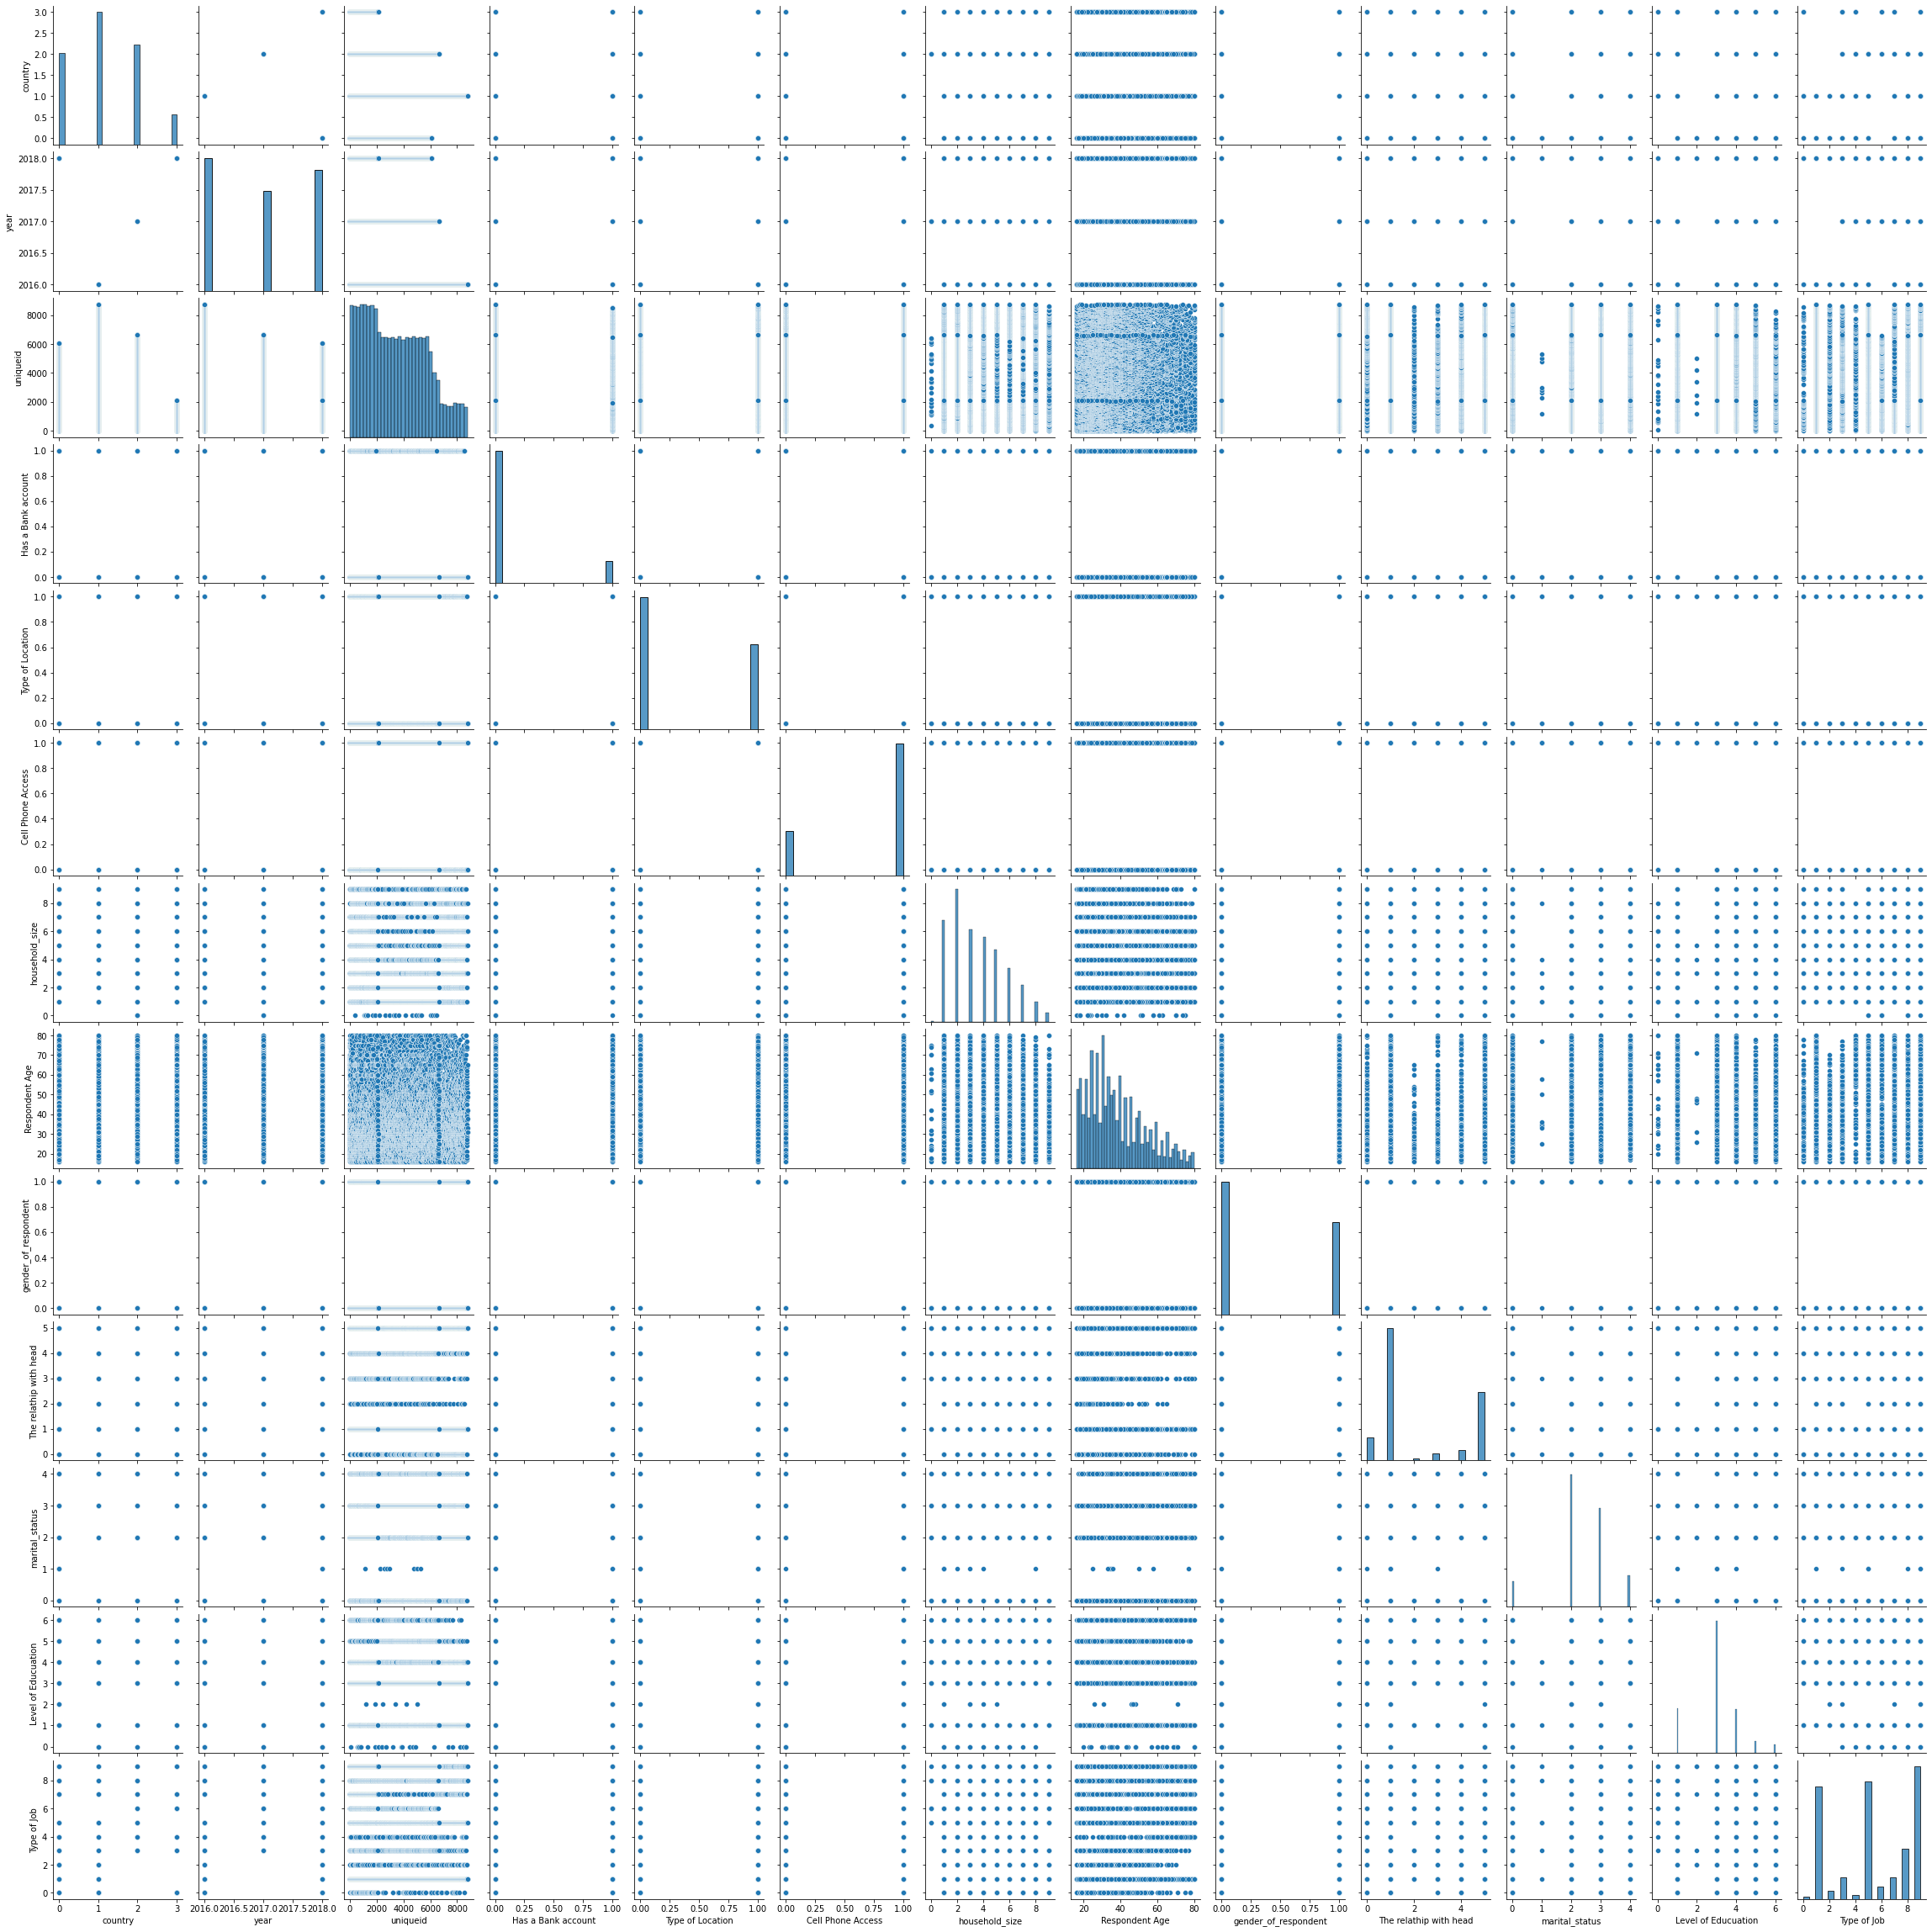

In [689]:
sns.pairplot(finances)

######heatmap

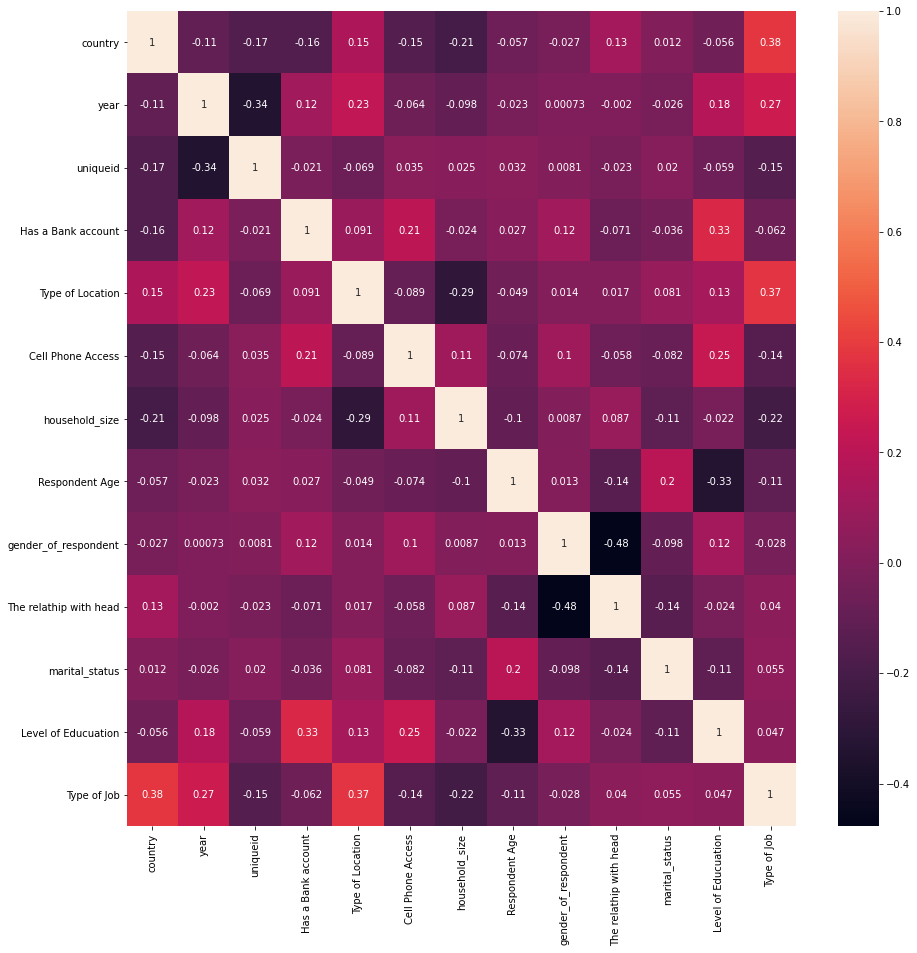

In [691]:
plt.subplots(figsize=(15,15))
sns.heatmap(finances.corr(),annot=True)

In [690]:
finances.corr()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.000000,-0.106125,-0.165102,-0.162867,0.153522,-0.153275,-0.209590,-0.056725,-0.026820,0.126242,0.012167,-0.055819,0.377321
year,-0.106125,1.000000,-0.339269,0.116153,0.225194,-0.064084,-0.097647,-0.023097,0.000731,-0.002016,-0.025678,0.183529,0.266132
uniqueid,-0.165102,-0.339269,1.000000,-0.021269,-0.068716,0.035359,0.025413,0.031871,0.008075,-0.022677,0.020426,-0.058610,-0.148701
Has a Bank account,-0.162867,0.116153,-0.021269,1.000000,0.090936,0.209925,-0.024015,0.027475,0.116453,-0.071386,-0.036305,0.327185,-0.062142
Type of Location,0.153522,0.225194,-0.068716,0.090936,1.000000,-0.089259,-0.287145,-0.048572,0.013803,0.017088,0.080779,0.130015,0.372961
Cell Phone Access,-0.153275,-0.064084,0.035359,0.209925,-0.089259,1.000000,0.108290,-0.074396,0.103780,-0.058224,-0.082412,0.245421,-0.143246
household_size,-0.209590,-0.097647,0.025413,-0.024015,-0.287145,0.108290,1.000000,-0.100127,0.008739,0.086938,-0.113873,-0.021842,-0.216356
Respondent Age,-0.056725,-0.023097,0.031871,0.027475,-0.048572,-0.074396,-0.100127,1.000000,0.013465,-0.138344,0.202043,-0.333374,-0.112702
gender_of_respondent,-0.026820,0.000731,0.008075,0.116453,0.013803,0.103780,0.008739,0.013465,1.000000,-0.477425,-0.098000,0.118895,-0.028393
The relathip with head,0.126242,-0.002016,-0.022677,-0.071386,0.017088,-0.058224,0.086938,-0.138344,-0.477425,1.000000,-0.135692,-0.023802,0.039745


####Principal Component Analysis 

> Creating the dataset and labels for the model

In [701]:
x = finances.drop(['Has a Bank account','uniqueid','year'], 1)
y = finances['Has a Bank account']

spliting the data set for training and testing

In [702]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

normalizing the datasets

In [703]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [704]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19221036, 0.15837193, 0.15518618, 0.10243396, 0.08278181,
       0.08152851, 0.0728697 , 0.05747916, 0.05370941, 0.04342899])

Predicting the  results

In [705]:
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Checking for the accuracy

In [706]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3844    0]
 [ 682    0]]
Accuracy 0.8493150684931506


> My PCA model can predict if a person has a bank account with an of 84.93 % accuracy

####Factor Analysis

Assumptions
* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be perfect multicollinearity.
* There should not be homoscedasticity between the variables.


Expectation:
> kmo of the model should be greater than 0.6

In [707]:
pip install factor_analyzer==0.2.3

In [708]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [709]:
x = finances.drop(['The relathip with head','uniqueid','year'], 1)

> calculating the chi_square_value and  p_value using the bartlett_sphericity

In [710]:
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(22406.830173546492, 0.0)

> Calculating the Kmo for the model

In [711]:
kmo_all,kmo_model=calculate_kmo(x)
kmo_all,kmo_model

(                           KMO
 country               0.651830
 Has a Bank account    0.576328
 Type of Location      0.637990
 Cell Phone Access     0.730861
 household_size        0.679359
 Respondent Age        0.488377
 gender_of_respondent  0.652632
 marital_status        0.642862
 Level of Educuation   0.560974
 Type of Job           0.634498, 0.615025443031936)

> Getting the Eigen values

In [712]:
fa = FactorAnalyzer()
fa.analyze(x, 10, rotation=None)

ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.948636
1,1.717099
2,1.260790
3,0.993859
4,0.825209
5,0.800045
6,0.728557
7,0.698687
8,0.525806
9,0.501313


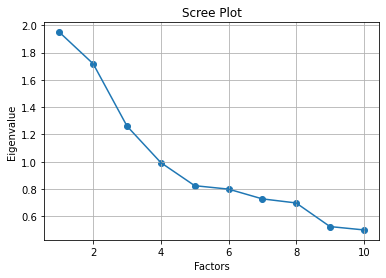

In [713]:
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

>Eigenvalues are the measure i used to pick the number of factors to use.
* The first 3 Eigenvalues were above 1.0

In [714]:
fa = FactorAnalyzer()
fa.analyze(x, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
country,0.440952,-0.264156,-0.066986
Has a Bank account,0.016148,0.599572,0.061288
Type of Location,0.572744,0.128841,0.049740
Cell Phone Access,-0.185551,0.366934,-0.127085
household_size,-0.439834,-0.025765,-0.198452
Respondent Age,-0.094527,-0.041393,0.719132
gender_of_respondent,-0.016351,0.199258,-0.023429
marital_status,0.110764,-0.068128,0.285776
Level of Educuation,0.149659,0.583009,-0.392760
Type of Job,0.661224,-0.136769,-0.096660


In [715]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.231704,0.985834,0.829223
Proportion Var,0.123170,0.098583,0.082922
Cumulative Var,0.123170,0.221754,0.304676




1.   Factor 1 has high factor loadings on :type of job and type of location
2.   Factor 2 has high factor loadings on :level of education and whether the user has a bank account or not
3.   Factor 3 has high factor loadings on :Respondent age
> a total of 30% variance is explained by the 3 factors


####Discriminant Analysis

> Creating the dataset and label for the model

In [716]:
x = finances.drop(['Has a Bank account','uniqueid','year'], 1)
y = finances['Has a Bank account']

>spliting the dataset to train and test sets

In [717]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

>Normalizing the dataset

In [718]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [719]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

> Predicting The results

In [720]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

> Checking for the accuracy

In [721]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3740  104]
 [ 477  205]]
Accuracy0.8716305788775961


>My LDA model can predict if a person has a bank account with an accuracy of 87.16 %

> For this dataset I used PDA and LDA models to test the accuracies so as to come up with an appropriate conclusion on the better model to use for the dataset.
>>The LDA model had a higher accuracy score compared to the PCA so should have a higher precidence when chosing a model.

###Challenging the solution

> On this dataset it would have been a good choice to try out another amalysis to see if the accuracy would inccrease as was the case with PCA and LDA methods

###Follow up questions

a). Did we have the right data?
> Yes, The data was sufficient.

 b). Do we need other data to answer our question?
>   The data was able to answer our research question


c). Did we have the right question?
> Yes, I achieved 87 % accuracy on the prediction